# Tugas Program

Topik: Klasifikasi pada Wine Dataset menggunakan metode KNN untuk menentukan jenis wine

Anggota:
1.   Muthia Rihadatul Aisyi - 1301223248
2.   Azra Feby Awfiyah - 1301223300
3.   Nasywa Alif Widyasari - 1301223357

# Pendahuluan dan Paparan Data


Pemrosesan data pada dataset Wine bertujuan untuk  mengklasifikasikan jenis wine dengan akurat berdasarkan 13 fitur yang tersedia agar dapat melihat pola atau karakteristik yang membedakan antara masing-masing jenis wine.

Dataset Wine terdiri dari 178 sampel dengan 13 fitur yang digunakan untuk menentukan kategori wine. Dataset ini mengelompokkan wine ke dalam 3 jenis berdasarkan karakteristik kimia dan fisiknya.

13 fitur yang digunakan dataset wine untuk pengelompokannya, yaitu :
1. Alcohol : Kandungan alkohol dalam wine yang dinyatakan dalam persen volume (% vol)
2. Malic.acid : Kadar asam malat yang memengaruhi keasaman wine dan memberikan karakteristik rasa asam segar
3. Ash : Kandungan abu yang tersisa setelah pembakaran komponen organik wine yang engindikasikan kadar mineral seperti kalium dan kalsium
4. Acl (Alkalinity of Ash) : Pengukuran kemampuan abu dalam menetralisir asam
5. Mg (Magnesium) : Kandungan magnesium dalam wine
6. Phenols : kandungan fenol yang memengaruhi warna, rasa, aroma wine, dan keawetan wine
7. Flavanoids : Salah satu jenis fenol yang memberikan kontribusi besar terhadap rasa pahit dan astringency pada wine. Flavanoids juga mempengaruhi stabilitas warna pada wine
8. Nonflavanoid.phenols : Jenis fenol lainnya yang berasal dari kulit dan biji anggur
9. Proanth (Proanthocyanins): Kandungan proantosianidin, senyawa polifenol yang juga memberikan pada rasa sepat
10. Color.int (Color Intensity) : Intensitas warna wine, yang mengukur seberapa pekat warna wine
11. Hue : Warna relatif wine yang menunjukkan pergeseran warna (dari ungu tua ke oranye)
12. OD (Dilution of OD280/OD315) : Kualitas dan karakteristik sensori wine, terutama yang berkaitan dengan komponen fenolik.
13. Proline : Konsentrasi prolin yang merupakan salah satu asam amino utama dalam wine. Proline juga sering menjadi indikator kualitas anggur yang digunakan.






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

df = pd.read_csv('wine.csv')
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


**1. Understanding Data**

In [2]:
print("data shape : ", df.shape)

data shape :  (178, 14)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.Wine.value_counts()

,count
Wine,
2,71
1,59
3,48


<Axes: xlabel='Alcohol', ylabel='Count'>

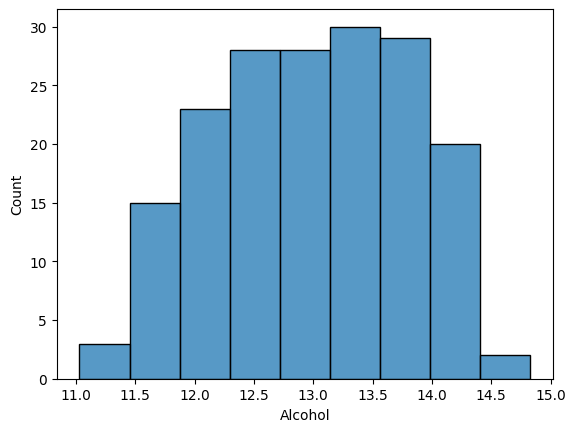

In [6]:
sns.histplot(df['Alcohol'])

**2. Preprocessing data**

Pada step ini dilakukan **cleaning data** sebagai proses menghilangkan data yang hilang, tidak relevan, duplikat, atau inkonsistensi pada dataset wine.



In [7]:
df.isnull().sum()

,0
Wine,0
Alcohol,0
Malic.acid,0
Ash,0
Acl,0
Mg,0
Phenols,0
Flavanoids,0
Nonflavanoid.phenols,0
Proanth,0


In [8]:
df.duplicated().sum()

0

Exploratory Data Analysis (EDA)

<ipython-input-9-1291bd53b914>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Wine', data=df, palette='flare')


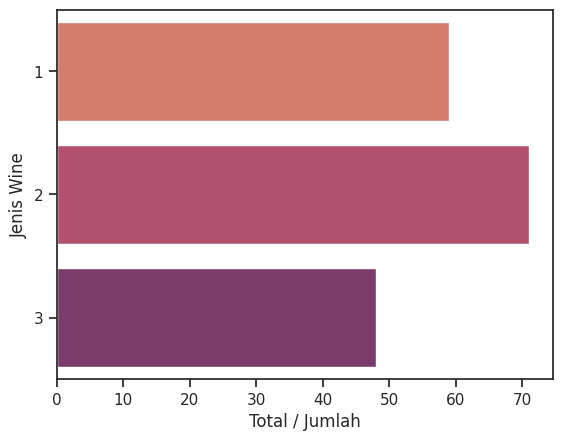

In [9]:
sns.set_theme(style="ticks")
sns.countplot(y='Wine', data=df, palette='flare')
plt.ylabel("Jenis Wine")
plt.xlabel('Total / Jumlah')
plt.show()

,Wine
0,1
1,1
2,1
3,1
4,1


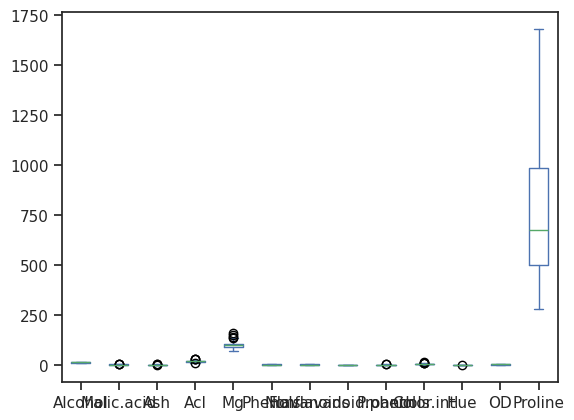

In [10]:
x = df.drop(columns = ['Wine'])
y = df['Wine']

x.plot(kind='box')
y.head()

In [11]:
#melihat persebaran data
from collections import Counter
target = y.values
counter = Counter(target)
for k,v in counter.items():
  per = v / len(target) *100
  print('Class=%s, Count=%d, Percentage=%.3f%%' % (k,v,per))

Class=1, Count=59, Percentage=33.146%
Class=2, Count=71, Percentage=39.888%
Class=3, Count=48, Percentage=26.966%


<Axes: >

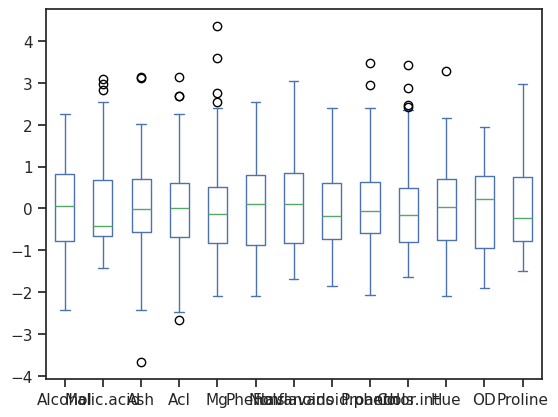

In [12]:
# Standar Scaler
x = (((x-x.mean()) / x.std()))
x.plot(kind='box')

Pada step ini tidak tercantum penggunaan proses **encoding** dikarenakan pada dataset wine semua kolom bersifat numerik dan kolom numerik tidak membutuhkan encoding.

**3. Data Preparation**

Pada data preparation dilakukan pengacakan data dan juga data splitting



In [13]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Sebelum masuk ke dalam proses splitting, data perlu diacak agar persebaran data di masing-masing fold lebih merata

In [14]:
# Mengacak data
x = x.sample(frac=1, random_state=42).reset_index(drop=True)
y = y.sample(frac=1, random_state=42).reset_index(drop=True)

In [15]:
# Menampilkan 5 baris pertama dari data acak
print(x.head())
print(y.head())

    Alcohol  Malic.acid       Ash       Acl        Mg   Phenols  Flavanoids  \
0  0.787585    0.683574  0.705257 -1.286079  1.138347  0.646939    1.001874   
1  1.489705    1.525003  0.267850 -0.178150  0.788268  0.886613    0.621440   
2 -0.086987    0.423984  1.215566  0.450674 -0.261969 -1.206537   -1.531017   
3  0.898446   -0.748647  1.215566  0.899835  0.088110  1.126287    1.222125   
4 -0.776789   -1.044043 -1.627580  0.031458 -1.522254 -0.295777   -0.029303   

   Nonflavanoid.phenols   Proanth  Color.int       Hue        OD   Proline  
0             -1.541573  0.120730   0.018078  0.011159  1.053978  0.311541  
1             -0.497005 -0.595603   0.078468 -0.382591  1.011724  1.057792  
2              1.351077 -1.469181  -0.197599 -0.820091 -0.424915 -0.466465  
3             -0.577356  1.378682   0.276890  1.017408  0.138473  1.708777  
4             -0.738059 -0.962506  -0.163090  0.711158  1.222995 -0.752263  
0    1
1    1
2    3
3    1
4    2
Name: Wine, dtype: int64


Data Splitting digunakan untuk membagi data untuk training dan testing yang digunakan untuk menguji model. Untuk data splitting kami menggunakan K fold untuk mengukur kinerja model supaya lebih akurat dan juga dapat menghindari over fitting.

In [16]:
# Melipat data menggunakan metode K-fold
number_of_folds = 5
number_per_fold = len(x) // number_of_folds

fold_split_index = []

for i in range(number_of_folds):
  start_index = number_of_folds * i
  end_index = start_index + number_per_fold
  test_index = np.arange(start_index, end_index)

  mask = ~np.isin(x.index, test_index)
  train_index = x.index[mask]

  fold_split_index.append((train_index, test_index))



# Metode dan Eksperimen




Modelling yang kami gunakan adalah K-Nearest Neighbors (KNN) dengan menggunakan KNN sebagai algoritma klasifikasi (knn classifier).

Alasan penggunaan KNN classifier adalah karena KNN dapat digunakan untuk klasifikasi data numerik dan kategorikal tanpa menggunakan informasi tambahan pada data.


**Data Processing**

In [17]:
 # Metode KNN
class KNNClassifier:
  def __init__(self, n_neighbors=5):
    self.n_neighbors = n_neighbors
    self.x_train = None
    self.y_train = None
  def fit(self, x, y):
    self.x_train = x
    self.y_train = y
  def predict(self, x):
    y_pred = [self._predict_one(x) for x in x]
    return np.array(y_pred)
  def _predict_one(self, x):
    distance = np.linalg.norm(self.x_train - x, axis = 1)
    nearest_indices = distance.argsort()[:self.n_neighbors]
    nearest_labels = self.y_train[nearest_indices]
    nearest_labels = np.array(nearest_labels).flatten()
    most_common = np.bincount(nearest_labels).argmax()
    return most_common

Sebelum melakukan evaluasi untuk data training dan data testing, kita perlu melakukan import library untuk memudahkan proses evaluasi

In [18]:
from sklearn.metrics import accuracy_score, f1_score

Selanjutnya, dilakukan tunning dengan range 1-14 untuk menemukan n-neighbors terbaik utnuk data ini.

Text(0, 0.5, 'performa dalam %')

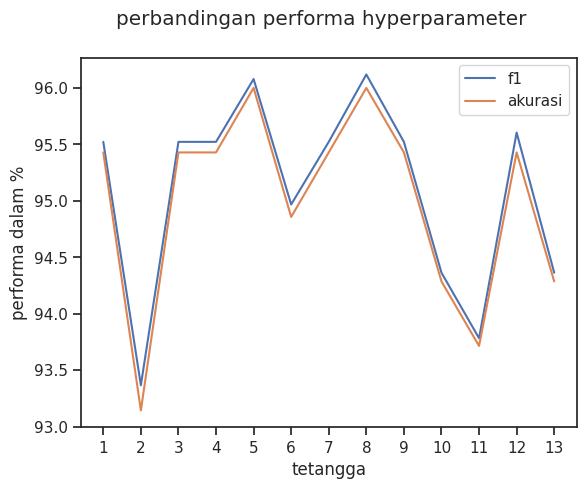

In [19]:
# Tunning

tunning_log_f1 = []
tunning_log_akurasi = []
for i in range(1, 14):
  model = KNNClassifier(n_neighbors = i)

  total_akurasi = 0
  total_f1 = 0

  for i, (train_index, test_index) in enumerate(fold_split_index): #loop setiap fold dari 1 ke 5
      x_train_fold = x.iloc[train_index].reset_index(drop = True)
      y_train_fold = y.iloc[train_index].reset_index(drop = True)
      x_test_fold = x.iloc[test_index].reset_index(drop = True)
      y_test_fold = y.iloc[test_index].reset_index(drop = True)

      model.fit(x_train_fold.values, y_train_fold.values)
      y_pred = model.predict(x_test_fold.values)

      f1 = f1_score(y_test_fold, y_pred, average = "macro") * 100
      akurasi = accuracy_score(y_test_fold, y_pred) * 100

      total_f1 += f1
      total_akurasi += akurasi

  tunning_log_f1.append(total_f1 / number_of_folds)
  tunning_log_akurasi.append(total_akurasi / number_of_folds)

plt.subplot(111)
plt.suptitle('perbandingan performa hyperparameter')
plt.plot(tunning_log_f1)
plt.plot(tunning_log_akurasi)
plt.legend(['f1', 'akurasi'])
plt.xlabel('tetangga')
plt.xticks(labels=np.arange(1,14), ticks=np.arange(0,13))
plt.ylabel('performa dalam %')

Setelah menggunakan tunning, didapatkan performa akurasi dan performa f1 skor yaitu :
- Performasi akurasi paling baik ada pada n-neighbors 5
- Performasi F1 paling baik ada pada n-neighbors 8

Maka dari itu, kami melakukan evaluasi data training dan data testing pada kedua titik tersebut.  

In [20]:
#training pada n-neighbors 8
model = KNNClassifier(n_neighbors=8)

print("EVALUASI KNN TERHADAP DATA TRAINING N = 8")
total_akurasi = 0
total_f1 = 0

for i, (train_index, test_index) in enumerate(fold_split_index):
  x_train_fold = x.iloc[train_index].reset_index(drop=True)
  y_train_fold = y.iloc[train_index].reset_index(drop=True)
  x_test_fold = x.iloc[test_index].reset_index(drop=True)
  y_test_fold = y.iloc[test_index].reset_index(drop=True)

  model.fit(x_train_fold.values, y_train_fold.values)
  y_pred = model.predict(x_train_fold.values)

  f1 = f1_score(y_train_fold, y_pred, average = "macro") * 100
  akurasi = accuracy_score(y_train_fold, y_pred) * 100

  total_f1 += f1
  total_akurasi += akurasi

  print(f'Akurasi fold ke-{i+1}\t: {akurasi}%')
  print(f'Skor F1 fold ke-{i+1}\t: {f1}%')
  print()

print("\nRata-rata f1 : ", total_f1 / number_of_folds)
print('Rata-rata Akurasi :', total_akurasi / number_of_folds)
print()

EVALUASI KNN TERHADAP DATA TRAINING N = 8
Akurasi fold ke-1	: 97.2027972027972%
Skor F1 fold ke-1	: 97.32372457518656%

Akurasi fold ke-2	: 97.2027972027972%
Skor F1 fold ke-2	: 97.34487734487735%

Akurasi fold ke-3	: 97.2027972027972%
Skor F1 fold ke-3	: 97.33339016039437%

Akurasi fold ke-4	: 96.5034965034965%
Skor F1 fold ke-4	: 96.6835679419447%

Akurasi fold ke-5	: 96.5034965034965%
Skor F1 fold ke-5	: 96.72072072072072%


Rata-rata f1 :  97.08125614862475
Rata-rata Akurasi : 96.92307692307693



In [21]:
#testing pada n-neighbors 8
model = KNNClassifier(n_neighbors=8)

print("EVALUASI KNN TERHADAP DATA TESTING N = 8")
total_akurasi = 0
total_f1 = 0

for i, (train_index, test_index) in enumerate(fold_split_index):
  x_train_fold = x.iloc[train_index].reset_index(drop=True)
  y_train_fold = y.iloc[train_index].reset_index(drop=True)
  x_test_fold = x.iloc[test_index].reset_index(drop=True)
  y_test_fold = y.iloc[test_index].reset_index(drop=True)

  model.fit(x_train_fold.values, y_train_fold.values)
  y_pred = model.predict(x_test_fold.values)

  f1 = f1_score(y_test_fold, y_pred, average = "macro") * 100
  akurasi = accuracy_score(y_test_fold, y_pred) * 100

  total_f1 += f1
  total_akurasi += akurasi

  print(f'Akurasi fold ke-{i+1}\t: {akurasi}%')
  print(f'Skor F1 fold ke-{i+1}\t: {f1}%')
  print()

print("\nRata-rata f1 : ", total_f1 / number_of_folds)
print('Rata-rata Akurasi :', total_akurasi / number_of_folds)
print()

EVALUASI KNN TERHADAP DATA TESTING N = 8
Akurasi fold ke-1	: 94.28571428571428%
Skor F1 fold ke-1	: 94.24054522093739%

Akurasi fold ke-2	: 94.28571428571428%
Skor F1 fold ke-2	: 94.39932048627702%

Akurasi fold ke-3	: 97.14285714285714%
Skor F1 fold ke-3	: 97.40129935032483%

Akurasi fold ke-4	: 97.14285714285714%
Skor F1 fold ke-4	: 97.33742959549411%

Akurasi fold ke-5	: 97.14285714285714%
Skor F1 fold ke-5	: 97.21739130434783%


Rata-rata f1 :  96.11919719147623
Rata-rata Akurasi : 95.99999999999997



In [22]:
#training pada n-neighbors 5
model = KNNClassifier(n_neighbors=5)

print("EVALUASI KNN TERHADAP DATA TRAINING N = 5")
total_akurasi = 0
total_f1 = 0

for i, (train_index, test_index) in enumerate(fold_split_index):
  x_train_fold = x.iloc[train_index].reset_index(drop=True)
  y_train_fold = y.iloc[train_index].reset_index(drop=True)
  x_test_fold = x.iloc[test_index].reset_index(drop=True)
  y_test_fold = y.iloc[test_index].reset_index(drop=True)

  model.fit(x_train_fold.values, y_train_fold.values)
  y_pred = model.predict(x_train_fold.values)

  f1 = f1_score(y_train_fold, y_pred, average = "macro") * 100
  akurasi = accuracy_score(y_train_fold, y_pred) * 100

  total_f1 += f1
  total_akurasi += akurasi

  print(f'Akurasi fold ke-{i+1}\t: {akurasi}%')
  print(f'Skor F1 fold ke-{i+1}\t: {f1}%')
  print()

print("\nRata-rata f1 : ", total_f1 / number_of_folds)
print('Rata-rata Akurasi :', total_akurasi / number_of_folds)
print()

EVALUASI KNN TERHADAP DATA TRAINING N = 5
Akurasi fold ke-1	: 98.6013986013986%
Skor F1 fold ke-1	: 98.63481633194895%

Akurasi fold ke-2	: 98.6013986013986%
Skor F1 fold ke-2	: 98.62821886017763%

Akurasi fold ke-3	: 97.9020979020979%
Skor F1 fold ke-3	: 97.90559286232227%

Akurasi fold ke-4	: 97.2027972027972%
Skor F1 fold ke-4	: 97.24213836477988%

Akurasi fold ke-5	: 97.9020979020979%
Skor F1 fold ke-5	: 97.99032769449964%


Rata-rata f1 :  98.08021882274566
Rata-rata Akurasi : 98.04195804195804



In [23]:
#testing pada n-neighbors 5
model = KNNClassifier(n_neighbors=5)

print("EVALUASI KNN TERHADAP DATA TESTING N = 5")
total_akurasi = 0
total_f1 = 0

for i, (train_index, test_index) in enumerate(fold_split_index):
  x_train_fold = x.iloc[train_index].reset_index(drop=True)
  y_train_fold = y.iloc[train_index].reset_index(drop=True)
  x_test_fold = x.iloc[test_index].reset_index(drop=True)
  y_test_fold = y.iloc[test_index].reset_index(drop=True)

  model.fit(x_train_fold.values, y_train_fold.values)
  y_pred = model.predict(x_test_fold.values)

  f1 = f1_score(y_test_fold, y_pred, average = "macro") * 100
  akurasi = accuracy_score(y_test_fold, y_pred) * 100

  total_f1 += f1
  total_akurasi += akurasi

  print(f'Akurasi fold ke-{i+1}\t: {akurasi}%')
  print(f'Skor F1 fold ke-{i+1}\t: {f1}%')
  print()

print("\nRata-rata f1 : ", total_f1 / number_of_folds)
print('Rata-rata Akurasi :', total_akurasi / number_of_folds)
print()

EVALUASI KNN TERHADAP DATA TESTING N = 5
Akurasi fold ke-1	: 94.28571428571428%
Skor F1 fold ke-1	: 94.24054522093739%

Akurasi fold ke-2	: 94.28571428571428%
Skor F1 fold ke-2	: 94.39932048627702%

Akurasi fold ke-3	: 94.28571428571428%
Skor F1 fold ke-3	: 94.41538629181649%

Akurasi fold ke-4	: 97.14285714285714%
Skor F1 fold ke-4	: 97.33742959549411%

Akurasi fold ke-5	: 100.0%
Skor F1 fold ke-5	: 100.0%


Rata-rata f1 :  96.07853631890501
Rata-rata Akurasi : 96.0



# Hasil dan Analisis

Berdasarkan hasil tunning KNN data ini akan memiliki performasi yang maksimal ketika n = 8 untuk skala evaluasi f1 dan ketika n = 5 untuk skala evaluasi akurasi.

Adapun skala evaluasi yang kami ambil adalah f1 dikarenakan f1 lebih akurat untuk data yang imbalance. Oleh karena itu, kami melakukan pengecekan performa f1 dan akurasi untuk data training dan testing dengan n = 5 dan n = 8.

.

**Pengecekan performa f1 dan akurasi untuk data training dan testing**

Dengan n = 8

- Training f1 = 97,08 %
- Training akurasi = 96,923 %
- **Testing f1 = 96,11 %**
- Testing akurasi = 95,999%


Dengan n = 5

- Training f1 = 98,08 %
- Training akurasi = 98,04 %
- Testing f1 = 96,07 %
- **Testing akurasi = 96,00%**



# Kesimpulan

Dari hasil tersebut, model KNN dengan n=8 dipilih sebagai model terbaik karena mempertimbangkan F1 score sebagai metrik evaluasi utama. Hal ini disebabkan F1 score lebih akurat dalam menangani data imbalance dibandingkan dengan akurasi.

Meskipun pada n=5 akurasi testing sedikit lebih tinggi (96,00%), F1 score pada testing dengan n=8 lebih optimal (96,11%).

Dengan demikian, model KNN dengan n=8 memberikan performa yang lebih baik secara keseluruhan untuk dataset Wine.

Untuk memprediksi data, terjadi underfit dikarenakan jumlah data yang kurang banyak. Nilai F1 score untuk data ini tergolong cukup baik meskipun terdapat data imbalance.

Hal ini menunjukkan bahwa model KNN masih mampu menangani data yang tidak seimbang dengan cukup baik, namun performa dapat ditingkatkan jika jumlah data lebih banyak atau dilakukan metode penanganan imbalance seperti oversampling atau undersampling.